In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
#import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('data/strongdrink.txt', na_values='?')
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Question 1
#### (a)

<IPython.core.display.Javascript object>


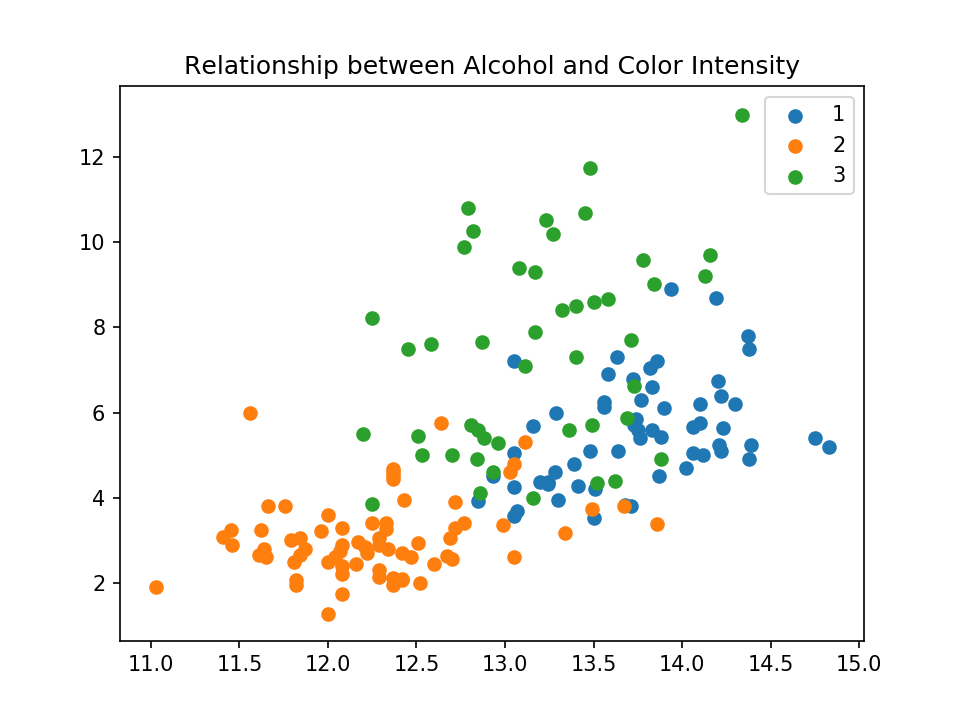

Text(0.5, 1.0, 'Relationship between Alcohol and Color Intensity')

In [49]:
%matplotlib notebook
for cultivar, group in df.groupby(['cultivar']):
    plt.scatter(group['alco'], group['color_int'],label=cultivar)
plt.legend()
plt.title('Relationship between Alcohol and Color Intensity')

#### (b) Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_uniform
Xvars = df[['alco', 'malic', 'tot_phen', 'color_int']].values
yvars = df.cultivar.values
MN_logit = \
    LogisticRegression()

param_dist1 = {'penalty': ['l1', 'l2'],
               'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(MN_logit, param_distributions=param_dist1,
                                   n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rs_fit1 = random_search1.fit(Xvars, yvars)
print(rs_fit1.best_params_)
print('MSE = ', abs(rs_fit1.best_score_))

{'C': 2.406759481848201, 'penalty': 'l1'}
MSE =  0.11363636363636363


#### (c) Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

param_dist2 = {'n_estimators': [10, 200],
                'max_depth': [2, 4],
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 4)}

random_forest = RandomForestClassifier()
random_search2 = RandomizedSearchCV(random_forest, param_distributions=param_dist2,
                                   n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
rs_fit2 = random_search2.fit(Xvars, yvars)
print('Optimal tuning parameters: ', rs_fit2.best_params_)
print('MSE = ', abs(rs_fit2.best_score_))

Optimal tuning parameters:  {'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 7, 'min_samples_split': 16, 'n_estimators': 200}
MSE =  0.13636363636363635


#### (d) SVC

In [45]:
from sklearn.svm import SVC
from scipy.stats import uniform as sp_uniform
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
                'gamma': ['scale', 'auto'],
                'shrinking': [True, False]}
svc = SVC(kernel='rbf')
random_search3 = RandomizedSearchCV(svc, param_distributions=param_dist3,
                                   n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
rs_fit3 = random_search3.fit(Xvars, yvars)
print('Optimal tuning parameters: ', rs_fit3.best_params_)
print('MSE = ', abs(rs_fit3.best_score_))

Optimal tuning parameters:  {'C': 9.58835943424229, 'gamma': 'scale', 'shrinking': True}
MSE =  0.13636363636363635


#### (e) Neural Network

In [48]:
from sklearn.neural_network import MLPClassifier
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
                'activation': ['logistic', 'relu'],
                'alpha': sp_uniform(0.1, 10.0)}

mlp = MLPClassifier()
random_search4 = RandomizedSearchCV(mlp, param_distributions=param_dist4,
                                   n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
rs_fit4 = random_search4.fit(Xvars, yvars)
print('Optimal tuning parameters: ', rs_fit4.best_params_)
print('MSE = ', abs(rs_fit4.best_score_))

Optimal tuning parameters:  {'activation': 'relu', 'alpha': 3.3360363852384634, 'hidden_layer_sizes': 83}
MSE =  0.21022727272727273


#### (f) 

Among logistic regression, random forest, SVM and nueral network, I think logistic regression performs the best, since it induces the smallest mean squared error.

Among random forest, SVM and nueral network, I think random forest and SVC perform equally well, since the MSE scores are the same.